# Day 2: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

![logistic regression](figure/logistic-regression.jpg)

## 1 Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

In [2]:
# Load the data
path = 'data/ex2data1.txt'
data = np.loadtxt(path, delimiter=',')
X = np.c_[np.ones((data.shape[0],1)), data[:, :2]]
y = np.c_[data[:, -1]]
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


### 1.1 Visualizing the data

In [3]:
def plotData(X, y, label_x, label_y, label_pos, label_neg , axes=None):
    # Get indexes for class 0 and class 1
    neg = (y.ravel() == 0)
    pos = (y.ravel() == 1)
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(X[pos][:, 1], X[pos][:, 2], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(X[neg][:, 1], X[neg][:, 2], marker='o', c='y', s=60, linewidth=2, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

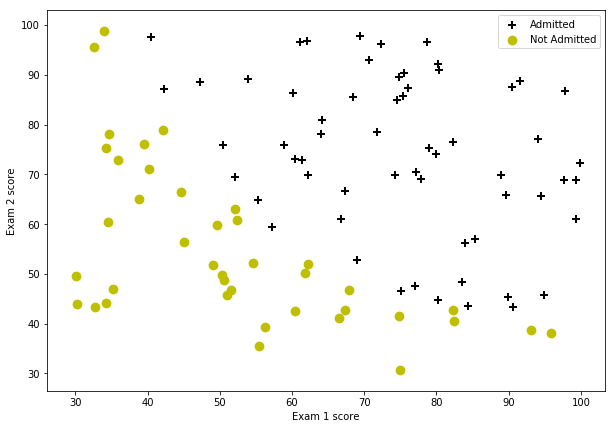

In [4]:
plotData(X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

### 1.2 Implementation

**1.2.1 Warmup exercise: sigmoid function**

The logistic regression hypothesis is defined as:
![hypothesis](figure/hypothesis-logistic-regression.jpg)
where function *g* is the sigmoid function. The sigmoid function is defined as:
![sigmoid](figure/sigmoid-function.jpg)

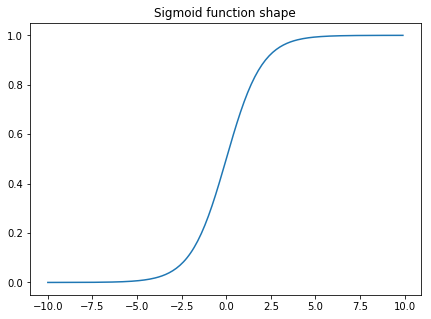

In [5]:
def sigmoid(z):
    '''Implement Sigmoid function.'''
    return (1 / (1 + np.exp(-z)))
    
# or call built-in function from library
from scipy.special import expit
# Quick check sigmoid function
x = np.arange(-10, 10, .1)
plt.figure(figsize=(7,5))
plt.plot(x, expit(x))
plt.title('Sigmoid function shape')
plt.show();

**1.2.2 Cost function and gradient**

Now you will implement the cost function and gradient for logistic regression. Recall that the cost function in logistic regression is
![cost](figure/cost-function-in-logistic-regression.jpg)
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j$ = 0; 1; ... ; n) is defined as follows:
![gradient](figure/gradient-of-logistic-regression.jpg)
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression
have different definitions of $h_\theta(x)$.

In [6]:
def h(theta, X):
    '''Hypothesis function using sigmoid function.
    Paramters:
        X: training set, which is matrix with m-rows and n-columns
        theta: parameters of the model, which is an n-vector
    Return: hypothesis value is m-vector.'''
    return sigmoid(np.dot(X, theta))

def costFunction(theta, X, y):
    '''Cost function in logistic regression.
    Parameters:
        X: training set, which is matrix with m-rows and n-columns 
        y: target set, which is a matrix with m-rows and 1-columns
        theta: parameters of the model, which is an n-vector
    Return: J cost value is scalar.'''
    m = X.shape[0]
    term1 = np.dot(y.T, np.log(h(theta, X)))
    term2 = np.dot((1-y).T, np.log(1 - h(theta, X)))
    return float((-1./m) * (np.sum(term1 + term2)))

In [7]:
# Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1], 1))
costFunction(initial_theta, X, y)

0.6931471805599453

Correct !!!

**1.2.3 Learning parameters using optimize function from scipy**

http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html

In [8]:
from scipy import optimize

def optimizeTheta(theta, X, y):
    result = optimize.fmin(costFunction, x0=theta, args=(X, y), maxiter=400, full_output=True)
    return result[0], result[1]

In [9]:
theta, mincost = optimizeTheta(initial_theta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [10]:
theta

array([-25.16130062,   0.20623142,   0.20147143])

In [11]:
# Call your costFunction function using the optimal parameters of theta. 
# The cost is about 0.203.
print(costFunction(theta, X, y))

0.2034977015902151


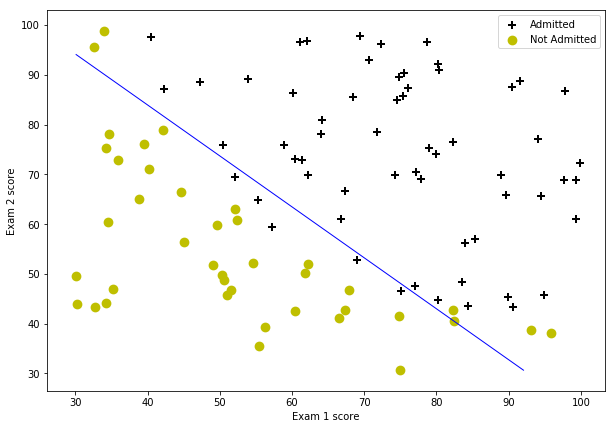

In [12]:
plotData(X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = expit(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(theta))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

**1.2.4 Evaluating logistic regression**

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776

In [13]:
expit(np.dot(theta, np.array([1, 45, 85])))

0.77629159041124107

In [14]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return (p.astype('int'))

In [15]:
p = predict(theta, X)
print('Train accuracy {}%'.format(100*sum(p ==y.ravel())/p.size))

Train accuracy 89.0%


## 2 Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data

In [16]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
print(data.shape)
data[:5]

(118, 3)


array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

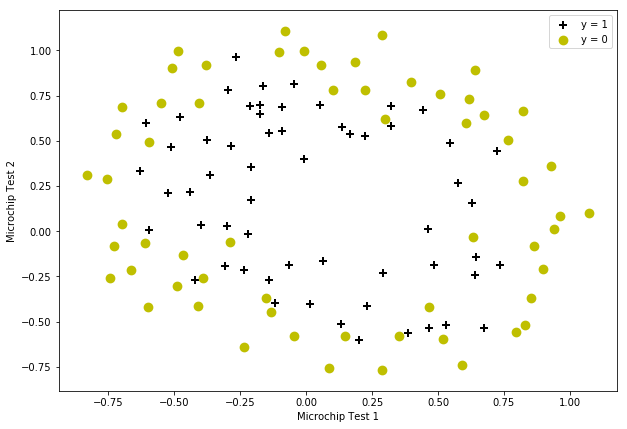

In [17]:
X = np.c_[np.ones((data.shape[0], 1)), data[:, :2]]
y = np.c_[data[:, -1]]
plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

### 2.2 Feature mapping

In [18]:
def mapFeature(x1col, x2col):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones((x1col.shape[0], 1))

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out = np.hstack((out, term))
    return out

In [19]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])
mappedX.shape

(118, 28)

### 2.3 Cost function and Gradient

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [20]:
def costFunctionReg(theta, X, y, lambd=0.):
    '''Cost function in Regularized Logistic Regression.
    Parameters:
        theta: parameters of the model, which is an n-vector
        X: training set, which is matrix with m-rows and n-columns 
        y: target set, which is a matrix with m-rows and 1-columns
        lambd: regularization parameter, default = 0
    Return: J cost value is scalar.'''
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    
    term1 = np.dot(y.T, np.log(h))
    term2 = np.dot((1-y).T, np.log(1 - h))
    reg = (lambd/(2*m)) * np.sum(np.square(theta[1:]))
    return float((-1./m) * (term1 + term2) + reg)

In [21]:
# Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((mappedX.shape[1], 1))
costFunctionReg(initial_theta, mappedX, y)

0.6931471805599454

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
##### $$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [22]:
def optimizeRegularizedTheta(theta, X, y, lambd=0.):
    result = optimize.minimize(costFunctionReg, theta, args=(X, y, lambd), 
                               method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta, mappedX, y)

### 2.4 Plotting the decision boundary

In [23]:
def plotBoundary(theta, X, y, lambd=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(theta, X, y, lambd)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    contour = plt.contour( xvals, yvals, zvals, [0])

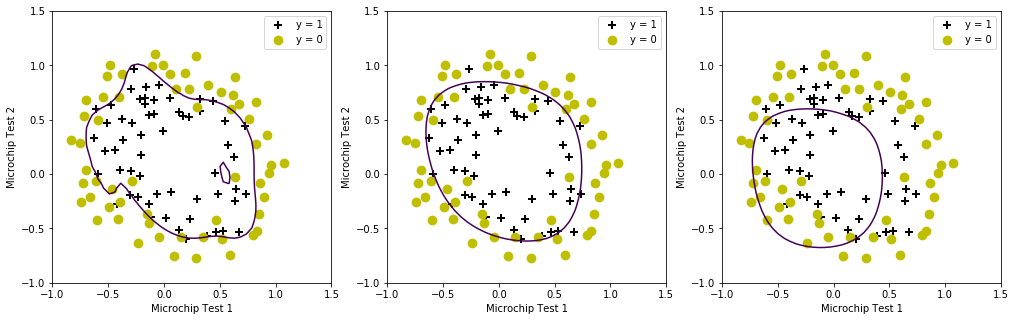

In [24]:
# Build a figure showing contours for various values of regularization parameter, lambda
# It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
plt.figure(figsize=(17,5))
plt.subplot(131)
plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(theta, mappedX, y, 0.)

plt.subplot(132)
plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(theta, mappedX, y, 1.)

plt.subplot(133)
plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(theta, mappedX, y, 100.)